In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve

### Задание 1

In [2]:
data = pd.read_csv("affair_data.csv")

In [3]:
X = data[data.columns[:-1]]
Y = data.affair

In [4]:
model = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
model.fit(X_train, Y_train)

P_test = model.predict_proba(X_test)[:, 1]

#### Построение ROC-кривых вручную и средствами библиотеки sklearn.metrics

In [5]:
tpr_manual = list()
fpr_manual = list()

for threshold in (range(0, 10, 1)):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for predicted_value, actual_value in (zip(P_test, Y_test)):
        if predicted_value >= threshold / 10:
            if actual_value == 1:
                tp += 1
            else:
                fp += 1
        else:
            if actual_value == 1:
                fn += 1
            else:
                tn += 1
            
    tpr_manual.append(tp / (tp + fn))
    fpr_manual.append(fp / (fp + tn))

In [6]:
fpr_library, tpr_library, thres = roc_curve(Y_test, P_test)

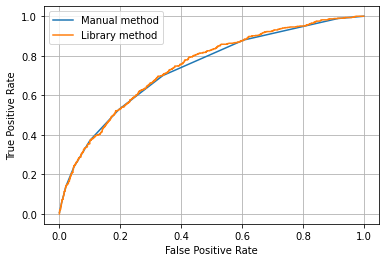

In [7]:
plt.plot(fpr_manual, tpr_manual, label = "Manual method")
plt.plot(fpr_library, tpr_library, label = "Library method")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc = 0)
plt.grid()

#### Построение кривой Precision - Recall

In [8]:
precision, recall, thres = precision_recall_curve(Y_test, P_test)

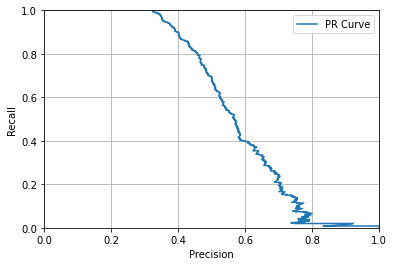

In [9]:
plt.plot(precision, recall, label = "PR Curve")

plt.xlabel("Precision")
plt.ylabel("Recall")

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.legend(loc = 0)
plt.grid()